# UCB (Upper Confidence Bound)

## Nombre:

- **Ibarra Calderón Luis Alberto**  
- **Soliz Ortega David Franz**

Se importan las librerías necesarias para ejecutar el entorno, realizar operaciones numéricas y crear gráficas.

In [ ]:
from snake_v1 import SnakeEnv
import numpy as np
import matplotlib.pyplot as plt
import pygame
import math

# Inicialización de variables y estructuras
Se definen los estados posibles, la tabla de valores `Q`, el conteo `N` y los parámetros para la técnica de exploración-explotación UCB.

In [ ]:
env = SnakeEnv()

# Parámetros
episodes = 2000
alpha = 0.1
gamma = 0.9
c = 2.0  # Factor de exploración UCB
scores = []

# Diccionarios para UCB
Q = {}
N_sa = {}  # Contador de visitas estado-acción
N_s = {}   # Contador de visitas estado

In [14]:
def get_ucb_value(state, action, t):
    """Calcula el valor UCB para un par estado-acción"""
    if state not in N_sa:
        N_sa[state] = np.zeros(len(env.actions))
        N_s[state] = 0
        Q[state] = np.zeros(len(env.actions))
    
    if N_sa[state][action] == 0:
        return float('inf')
    
    exploitation = Q[state][action]
    exploration = c * math.sqrt(math.log(t + 1) / N_sa[state][action])
    return exploitation + exploration

def choose_action(state, t):
    """Selecciona acción usando UCB"""
    if state not in Q:
        Q[state] = np.zeros(len(env.actions))
        N_sa[state] = np.zeros(len(env.actions))
        N_s[state] = 0
    
    ucb_values = [get_ucb_value(state, a, t) for a in range(len(env.actions))]
    return np.argmax(ucb_values)

# Entrenamiento con el índice de confianza superior (UCB)
El agente utiliza UCB para elegir acciones, considerando la incertidumbre basada en el número de veces que se ha explorado una acción.

In [15]:
# Entrenamiento
total_steps = 0
rewards_history = []

for episode in range(episodes):
    state = env.reset()
    episode_reward = 0
    done = False
    
    while not done:
        action = choose_action(state, total_steps)
        next_state, reward, done = env.step(action)
        episode_reward += reward
        
        # Actualizar contadores
        N_sa[state][action] += 1
        N_s[state] += 1
        total_steps += 1
        
        # Actualizar Q-values
        old_value = Q[state][action]
        next_max = np.max(Q[next_state]) if next_state in Q else 0
        new_value = old_value + alpha * (reward + gamma * next_max - old_value)
        Q[state][action] = new_value
        
        state = next_state
    
    scores.append(env.score)
    rewards_history.append(episode_reward)
    
    if (episode + 1) % 100 == 0:
        print(f"Episodio {episode + 1}, Promedio últimos 100: {np.mean(scores[-100:]):.2f}")

Episodio 100, Promedio últimos 100: 0.24
Episodio 200, Promedio últimos 100: 0.72
Episodio 300, Promedio últimos 100: 3.06
Episodio 400, Promedio últimos 100: 13.26
Episodio 500, Promedio últimos 100: 21.16
Episodio 600, Promedio últimos 100: 27.09
Episodio 700, Promedio últimos 100: 26.50
Episodio 800, Promedio últimos 100: 26.22
Episodio 900, Promedio últimos 100: 24.84
Episodio 1000, Promedio últimos 100: 26.05
Episodio 1100, Promedio últimos 100: 32.41
Episodio 1200, Promedio últimos 100: 27.62
Episodio 1300, Promedio últimos 100: 23.85
Episodio 1400, Promedio últimos 100: 18.24
Episodio 1500, Promedio últimos 100: 20.77
Episodio 1600, Promedio últimos 100: 25.01
Episodio 1700, Promedio últimos 100: 27.07
Episodio 1800, Promedio últimos 100: 26.44
Episodio 1900, Promedio últimos 100: 25.33
Episodio 2000, Promedio últimos 100: 30.04


# Visualización del rendimiento
Se grafican las recompensas obtenidas y el porcentaje de exploración para cada valor de `c`, que controla el grado de exploración del agente.

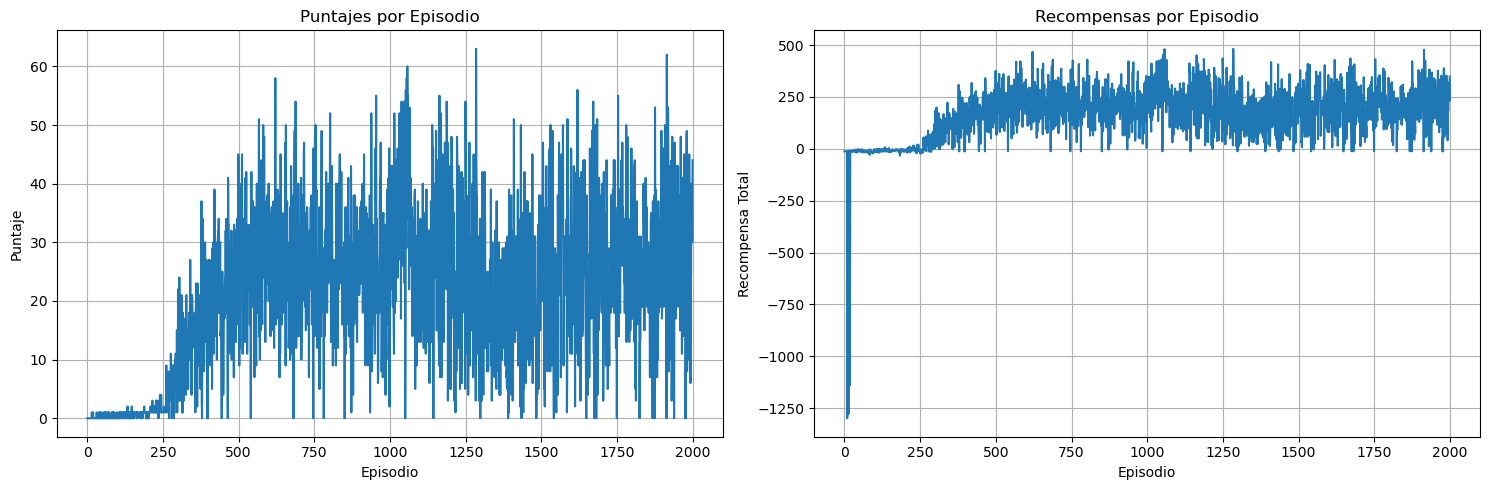

Puntaje promedio en últimos 100 episodios: 30.04
Recompensa promedio en últimos 100 episodios: 233.64


In [16]:
# Visualización de resultados
plt.figure(figsize=(15, 5))

# Subplot para puntajes
plt.subplot(1, 2, 1)
plt.plot(scores)
plt.title('Puntajes por Episodio')
plt.xlabel('Episodio')
plt.ylabel('Puntaje')
plt.grid(True)

# Subplot para recompensas
plt.subplot(1, 2, 2)
plt.plot(rewards_history)
plt.title('Recompensas por Episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.grid(True)

plt.tight_layout()
plt.show()

# Estadísticas finales
print(f"Puntaje promedio en últimos 100 episodios: {np.mean(scores[-100:]):.2f}")
print(f"Recompensa promedio en últimos 100 episodios: {np.mean(rewards_history[-100:]):.2f}")

# Demostración del Agente UCB
Visualización del comportamiento del agente entrenado con UCB

In [17]:
# Demostración del agente entrenado
def play_trained_agent():
    state = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        pygame.event.pump()
        # Usar la política aprendida (sin exploración)
        action = np.argmax(Q.get(state, np.zeros(len(env.actions))))
        state, reward, done = env.step(action)
        total_reward += reward
        env.render()
        pygame.time.delay(100)
    
    pygame.quit()
    return total_reward, env.score

# Ejecutar demostración
reward, score = play_trained_agent()
print(f"Demostración finalizada - Puntaje: {score}, Recompensa total: {reward}")

Demostración finalizada - Puntaje: 35, Recompensa total: 276.00000000000114
